In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


In [143]:
dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30


In [144]:
dataset.head(5) # Viewing the Data


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [225]:
dataset.shape

(26996, 42)

In [145]:
dataset.columns


Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [146]:
dataset.describe() # Distribution of Numerical Variables


,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [147]:
# Removing NaN
dataset.isna().sum() #sum of na values 


user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [148]:
dataset.isna().any() #columns having atleast 1 na


user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [149]:
dataset=dataset[pd.notnull(dataset['age'])]

In [150]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])


In [151]:
#Histogram
dataset2 = dataset.drop(columns = ['user', 'churn'])


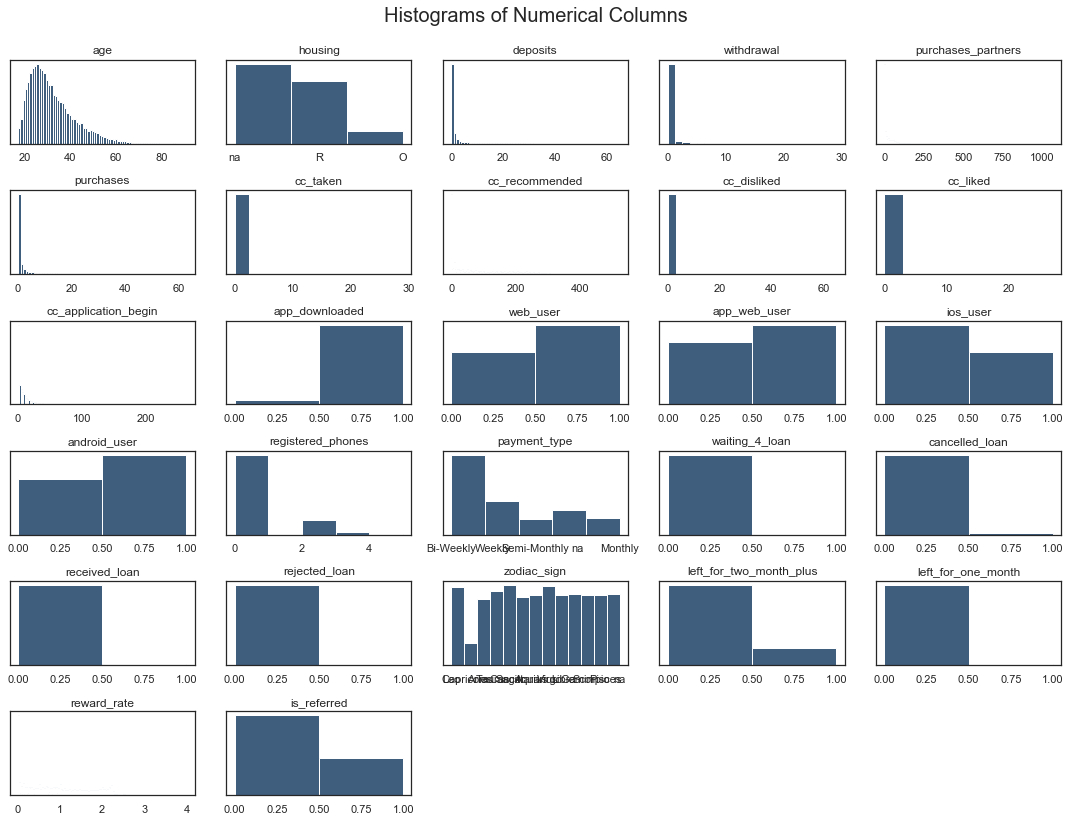

In [152]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [153]:
#pie plots
#subset of dataset that have binary columns
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

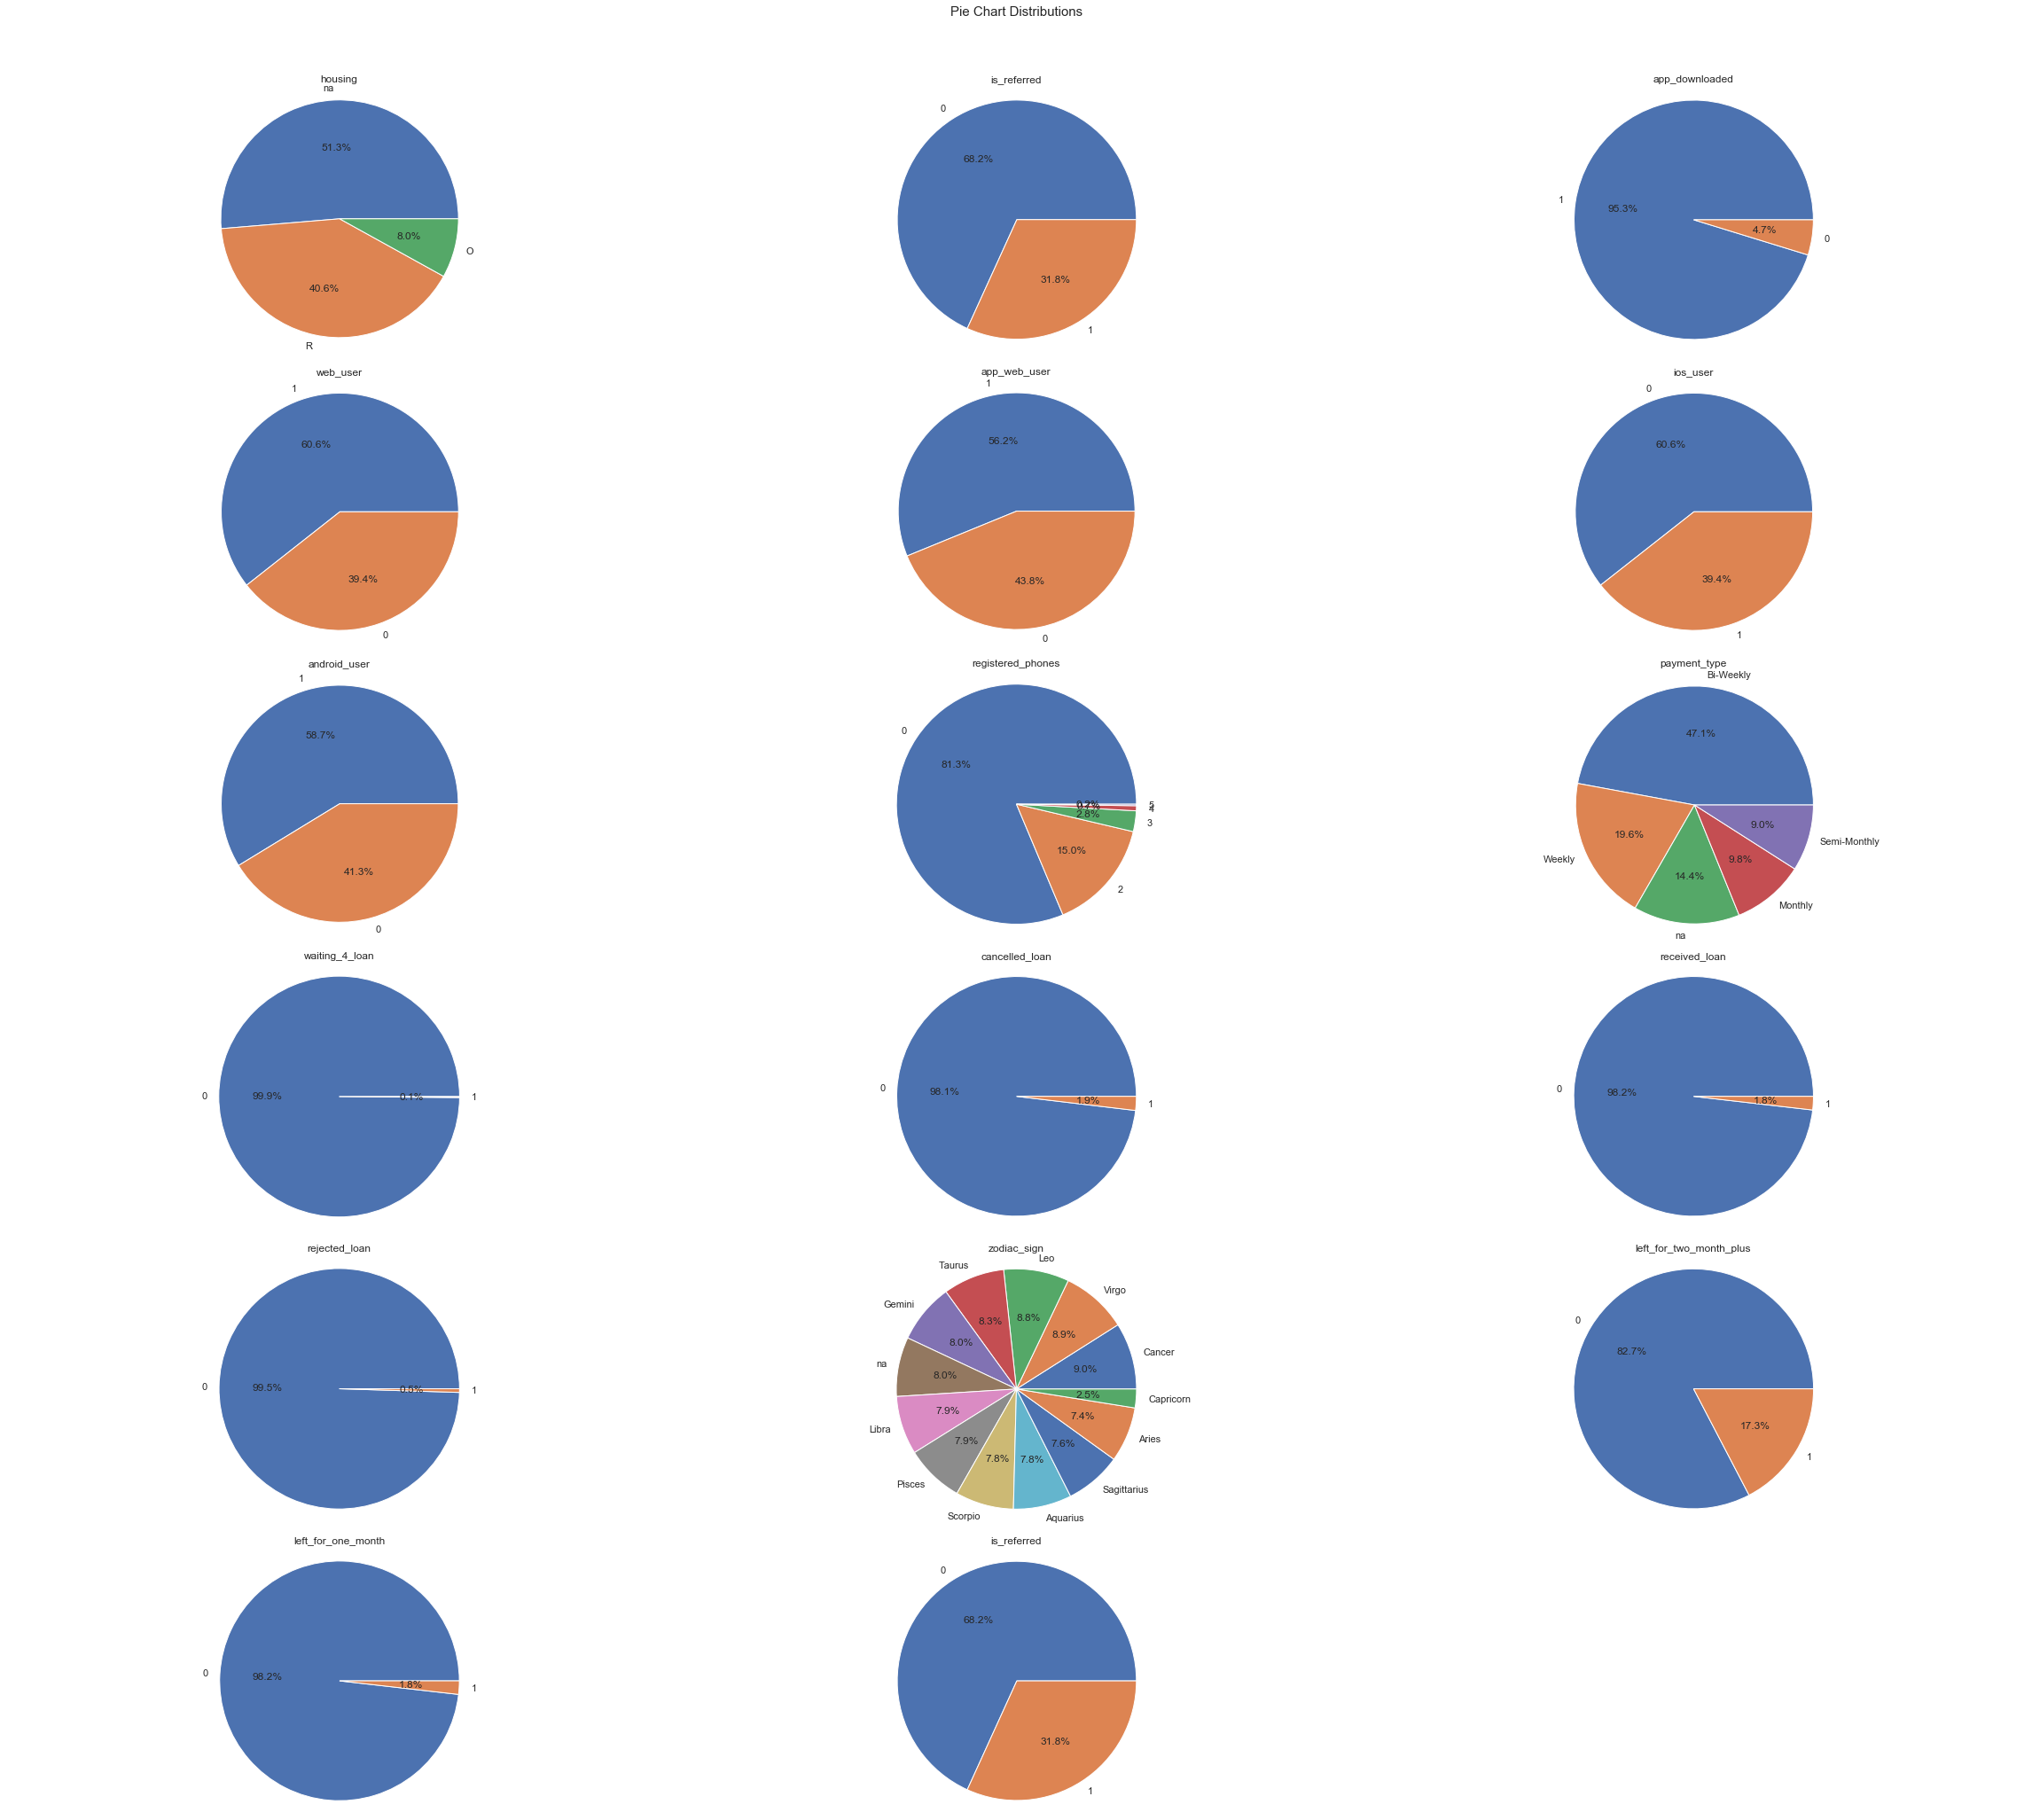

In [154]:
fig = plt.figure(figsize=(32, 30))
plt.suptitle('Pie Chart Distributions', fontsize=15)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal') #makes sure that no X or Y axes are shown on the image
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [155]:
## Exploring Uneven Features

dataset[dataset2.waiting_4_loan == 1].churn.value_counts() #if this particular col is 1, what is the distribution of churn


0    27
1     8
Name: churn, dtype: int64

In [156]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()


1    274
0    234
Name: churn, dtype: int64

In [157]:
dataset[dataset2.received_loan == 1].churn.value_counts()


1    292
0    199
Name: churn, dtype: int64

In [158]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()


1    107
0     25
Name: churn, dtype: int64

In [159]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()


1    266
0    222
Name: churn, dtype: int64

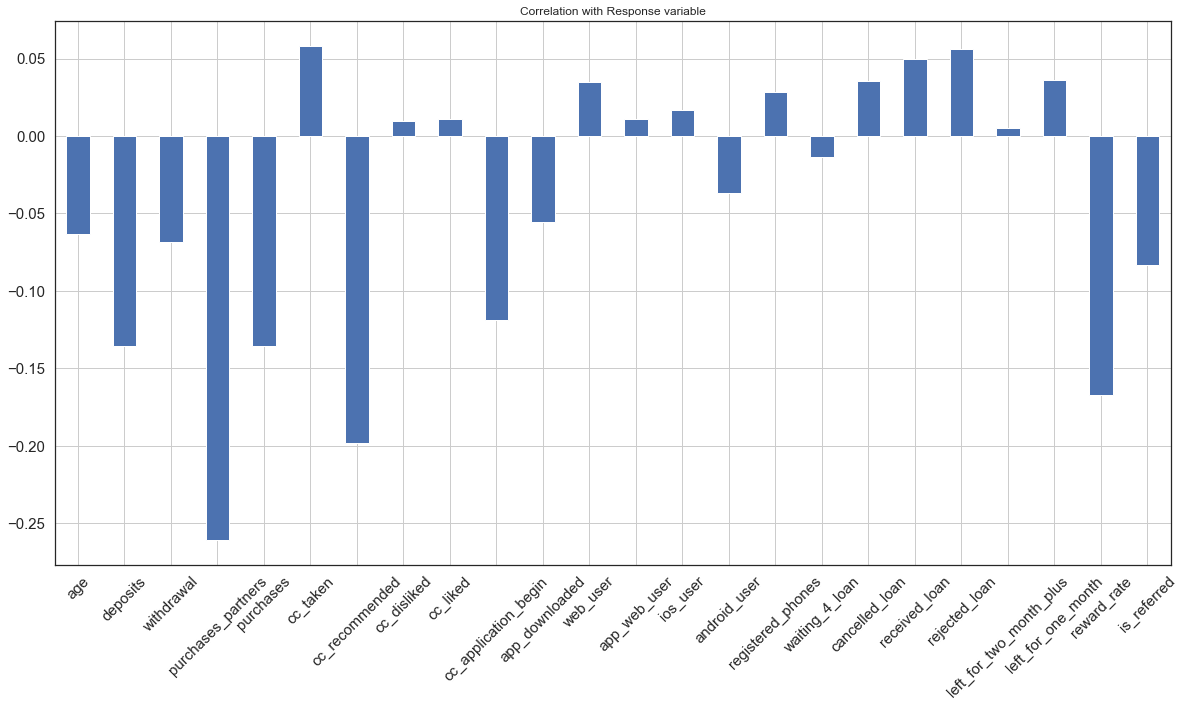

In [160]:
## Correlation with Response Variable
dataset.drop(columns = ['churn', 'user', 'housing', 
                        'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(figsize=(20,10), 
                                                                                         title='Correlation with Response variable', 
                                                                                         fontsize=15, rot=45, grid=True)

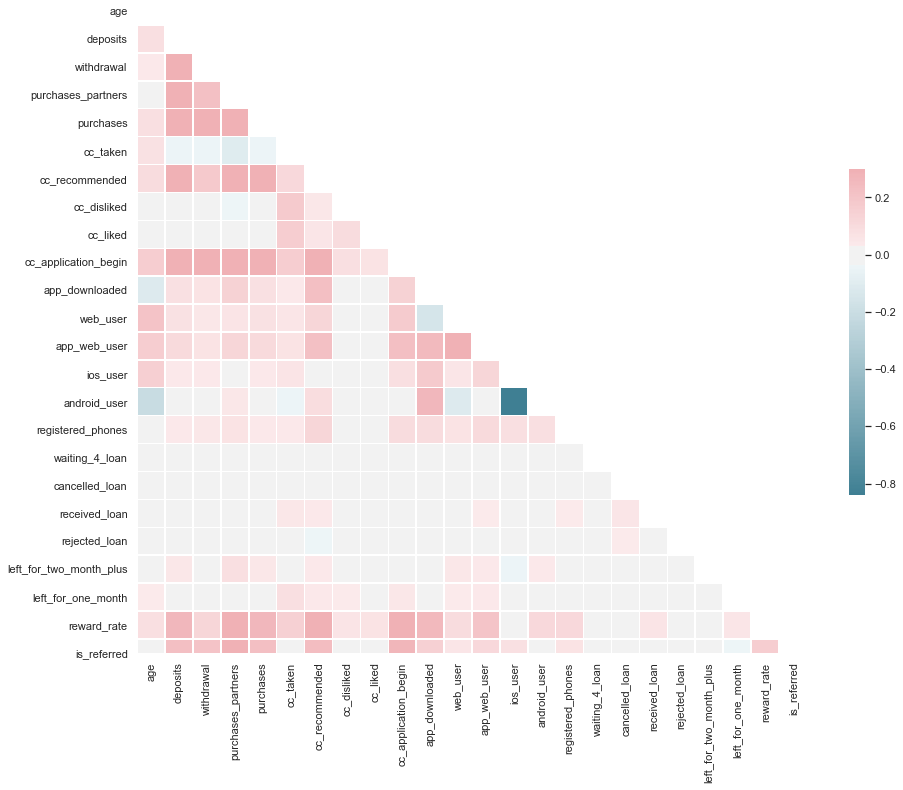

In [161]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [162]:
dataset = dataset.drop(columns = ['app_web_user'])


In [163]:
dataset.to_csv('new_churn_data.csv', index = False)


# Model building

In [164]:

import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [165]:
dataset = pd.read_csv('new_churn_data.csv')


In [166]:
## Data Preparation
#seperating user identifier from the dataset
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [167]:
# One-Hot Encoding
dataset.housing.value_counts()


na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [168]:
dataset = pd.get_dummies(dataset) #get_dummies() does one-hot encoding for us
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [169]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])


In [170]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split


In [171]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

# Balancing the Training Set


In [172]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [173]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [174]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [175]:
random.seed(0)  #for dyplicating purpose
higher = np.random.choice(higher, size=len(lower)) #make higher as big as the lower indexes by chopping off some values randomly
lower = np.asarray(lower) #making lower also numpy array for consistency purpose
new_indexes = np.concatenate((lower, higher)) #combimation of lower and higher having same size

X_train = X_train.loc[new_indexes,] #subset the training set by the values that we have selected
y_train = y_train[new_indexes]

In [176]:
# transform data such that its distribution will have a mean value 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler 


In [177]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [178]:
X_train2.columns = X_train.columns.values #extracting values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [179]:
X_train = X_train2
X_test = X_test2

In [180]:
X_test2

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,-0.021657,0.881988,-0.273796,-0.622123,0.906967,2.049111,1.232521,-0.055602,-0.073358,1.892019,...,-0.312419,-0.160312,-0.298521,-0.313819,-0.296963,-0.287607,3.456463,-0.290673,-0.298854,-0.314571
21018,-0.718995,-0.356637,-0.273796,2.512343,-0.356328,-0.170842,1.698746,-0.055602,-0.073358,-0.407931,...,-0.312419,-0.160312,3.349845,-0.313819,-0.296963,-0.287607,-0.289313,-0.290673,-0.298854,-0.314571
5590,1.472639,0.881988,1.556971,-0.646803,0.906967,-0.170842,0.425155,1.888013,-0.073358,2.220584,...,-0.312419,-0.160312,-0.298521,-0.313819,-0.296963,-0.287607,-0.289313,-0.290673,3.346110,-0.314571
15769,0.077963,-0.356637,-0.273796,-0.449357,-0.356328,-0.170842,-1.007634,-0.055602,-0.073358,-0.572213,...,-0.312419,6.237845,-0.298521,-0.313819,-0.296963,-0.287607,-0.289313,-0.290673,-0.298854,-0.314571
15120,-1.017854,0.318977,-0.273796,3.228087,0.332742,-0.170842,1.732860,-0.055602,-0.073358,2.138443,...,-0.312419,-0.160312,-0.298521,3.186548,-0.296963,-0.287607,-0.289313,-0.290673,-0.298854,-0.314571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,4.461232,-0.356637,-0.273796,-0.646803,-0.356328,-0.170842,-1.019005,-0.055602,-0.073358,-0.654354,...,-0.312419,-0.160312,-0.298521,-0.313819,-0.296963,-0.287607,3.456463,-0.290673,-0.298854,-0.314571
9851,0.576062,-0.244035,0.641587,-0.622123,-0.241483,-0.170842,-1.030377,-0.055602,-0.073358,-0.654354,...,-0.312419,-0.160312,-0.298521,-0.313819,-0.296963,-0.287607,-0.289313,-0.290673,-0.298854,-0.314571
654,0.476442,-0.356637,-0.273796,-0.646803,-0.356328,2.049111,1.278006,-0.055602,-0.073358,-0.079366,...,-0.312419,-0.160312,-0.298521,-0.313819,-0.296963,-0.287607,-0.289313,-0.290673,3.346110,-0.314571
26248,-0.519755,-0.131432,-0.273796,0.365111,-0.126638,-0.170842,-0.302611,-0.055602,-0.073358,-0.407931,...,-0.312419,-0.160312,-0.298521,-0.313819,-0.296963,-0.287607,3.456463,-0.290673,-0.298854,-0.314571


In [181]:
from sklearn.linear_model import LogisticRegression


In [182]:
classifier = LogisticRegression(random_state = 0)


In [183]:
classifier.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
#Predicting Test Set
y_pred = classifier.predict(X_test)


In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)


In [214]:
accuracy_score(y_test, y_pred)


0.6107407407407407

In [186]:
precision_score(y_test, y_pred) # tp / (tp + fp) - how many of the predictions are actually true


0.5239005736137667

In [216]:
recall_score(y_test, y_pred) # tp / (tp + fn) - of all the actual +ves that exist, how many predictions are true


0.7376902417188899

In [188]:
f1_score(y_test, y_pred) #function of precision and recall - it balances them out
#the result may be low because the test set may not be balanced like the train set

0.6120625465376024

Test Data Accura cy: 0.6107


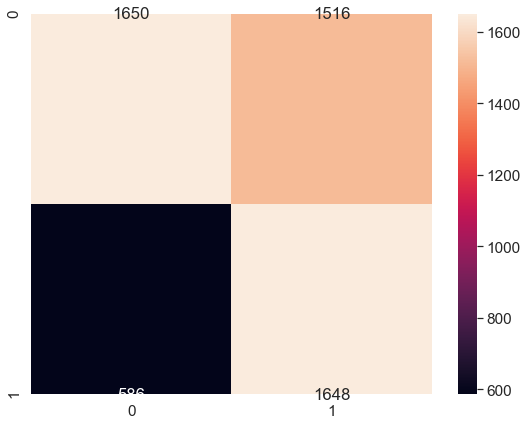

In [218]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1)) #dataframe of confusion matrix
plt.figure(figsize = (9,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accura cy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [190]:
# K FOLD CROSS VALIDATION 
from sklearn.model_selection import cross_val_score


In [191]:
accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train, cv = 10) #cv=no. of folds

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [192]:
accuracies

array([0.65100671, 0.65883669, 0.64541387, 0.64373602, 0.62919463,
       0.65715884, 0.64932886, 0.65044743, 0.63926174, 0.65436242])

In [193]:
#analyzing coefficients
accuracies.mean() #means the accuracy is pretty consistent throughout all folds

0.6478747203579418

In [194]:
#concatinating the dataframes
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1) 

,features,coef
0,age,-0.183861
1,deposits,0.502619
2,withdrawal,0.046431
3,purchases_partners,-0.699909
4,purchases,-0.645927
5,cc_taken,0.107270
6,cc_recommended,0.072970
7,cc_disliked,-0.030220
8,cc_liked,0.027310
9,cc_application_begin,0.022218


In [220]:
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LogisticRegression 

# Recursive Feature Elimination (RFE):
Recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute

In [196]:
classifier = LogisticRegression()

In [197]:
X_train.shape

(17880, 41)

In [223]:
rfe=RFE(classifier, 20)

In [224]:
rfe=rfe.fit(X_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [200]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True False  True  True  True  True  True  True  True False
  True  True False False False False False False False False False False
  True False False False False]


In [201]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_R', 'payment_type_Bi-Weekly',
       'zodiac_sign_Pisces'],
      dtype='object')

In [202]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  7,  8, 10,  4,  1,  1,  5,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  9,  1,  1, 18, 22,  2, 14, 20, 21, 16,  6,
       13, 11,  1, 19, 15, 12, 17])

In [203]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])


In [205]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.6107407407407407

In [206]:
precision_score(y_test, y_pred) # tp / (tp + fp)


0.5208596713021492

In [207]:
recall_score(y_test, y_pred) # tp / (tp + fn)


0.7376902417188899

In [208]:
f1_score(y_test, y_pred)

0.6105965172286032

Test Data Accuracy: 0.6107


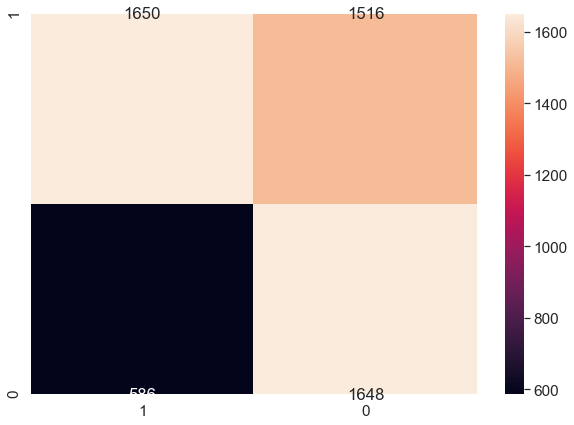

In [209]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [210]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.184333
1,deposits,0.504850
2,withdrawal,0.046712
3,purchases_partners,-0.707572
4,purchases,-0.643914
5,cc_taken,0.108285
6,cc_recommended,0.088125
7,web_user,0.145978
8,ios_user,0.065717
9,registered_phones,0.078501


In [211]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [212]:
final_results

,user,churn,predicted_churn
0,61353,1.0,0
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,0
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
